# Simple Exponential Smoothing - Monthly and Annual Forecast

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## Monthly Forescast

### Data

In [3]:
np.random.seed(42)  # For reproducibility

# Create a date range (5 years of monthly data)
date_range = pd.date_range(start='2019-01-01', end='2024-12-01', freq='MS')

# Create a time series with trend and seasonality
demand = 100 + np.linspace(0, 50, len(date_range)) + 10 * np.sin(np.linspace(0, 12 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))

# Build DataFrame
df = pd.DataFrame({'Demand': demand}, index=date_range)
df.index.name = 'Month'


### Information of Data

In [21]:
df.describe()

,Demand,Forecast
count,72.000000,72.000000
mean,124.477054,123.150498
std,16.199674,15.095693
min,94.346430,98.162534
25%,111.395391,110.373941
50%,123.497563,121.664892
75%,138.767246,136.050083
max,157.690183,151.944622


### Plot 

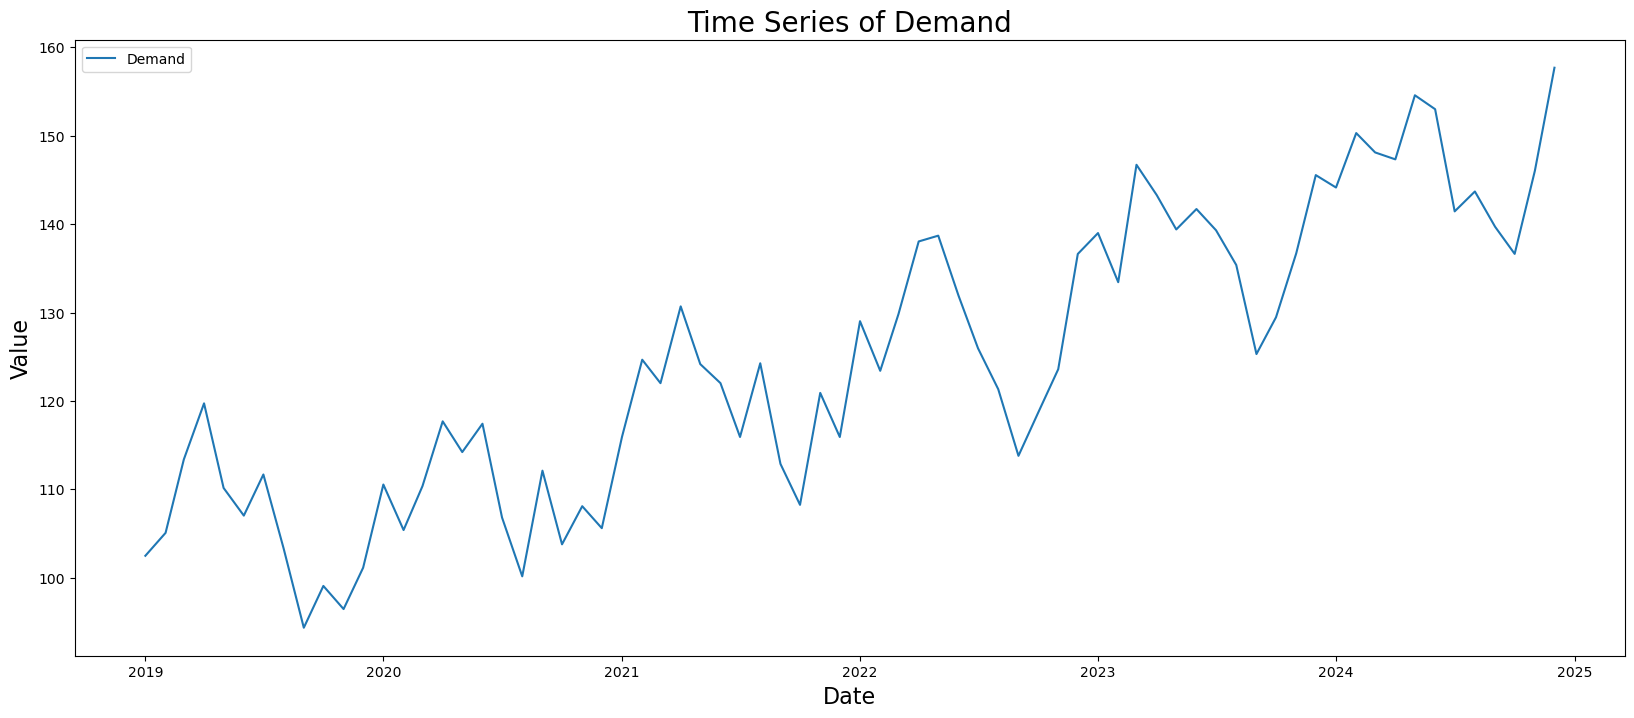

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], label='Demand')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Time Series of Demand', fontsize=20)
plt.legend()
plt.show()

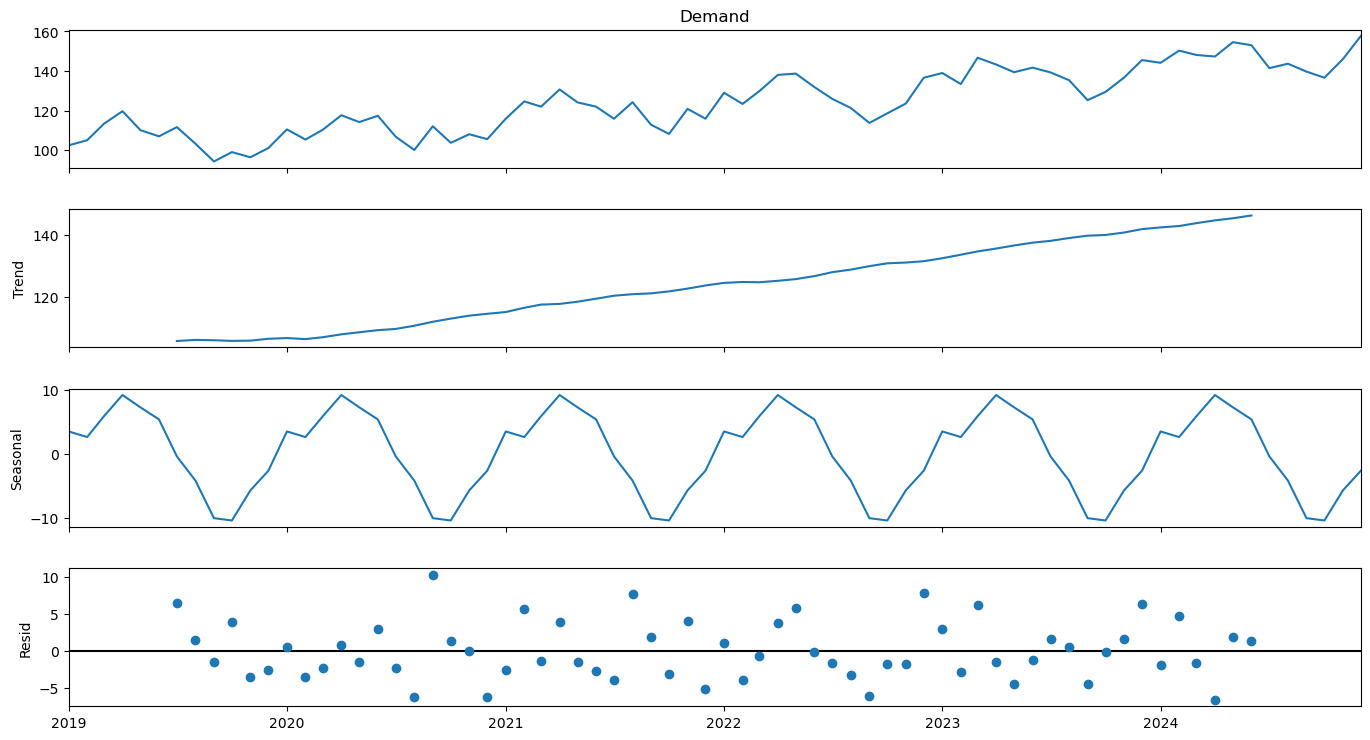

In [24]:
# -------------------------------------------------
# Decompose the series into trend, seasonal, noise
# -------------------------------------------------
decompose_result = seasonal_decompose(df['Demand'])
fig = decompose_result.plot()
fig.set_size_inches(15, 8)
plt.show()

### Apply Simple Exponential Smoothing

In [25]:
model = SimpleExpSmoothing(df['Demand']).fit(smoothing_level=0.5, optimized=False)
df['Forecast'] = model.fittedvalues

In [26]:
df

,Demand,Forecast
Month,,
2019-01-01,102.483571,102.483571
2019-02-01,105.076633,102.483571
2019-03-01,113.379949,103.780102
2019-04-01,119.725378,108.580026
2019-05-01,110.155150,114.152702
...,...,...
2024-08-01,143.691748,146.693051
2024-09-01,139.697951,145.192399
2024-10-01,136.632895,142.445175


### Plot observed vs forecast

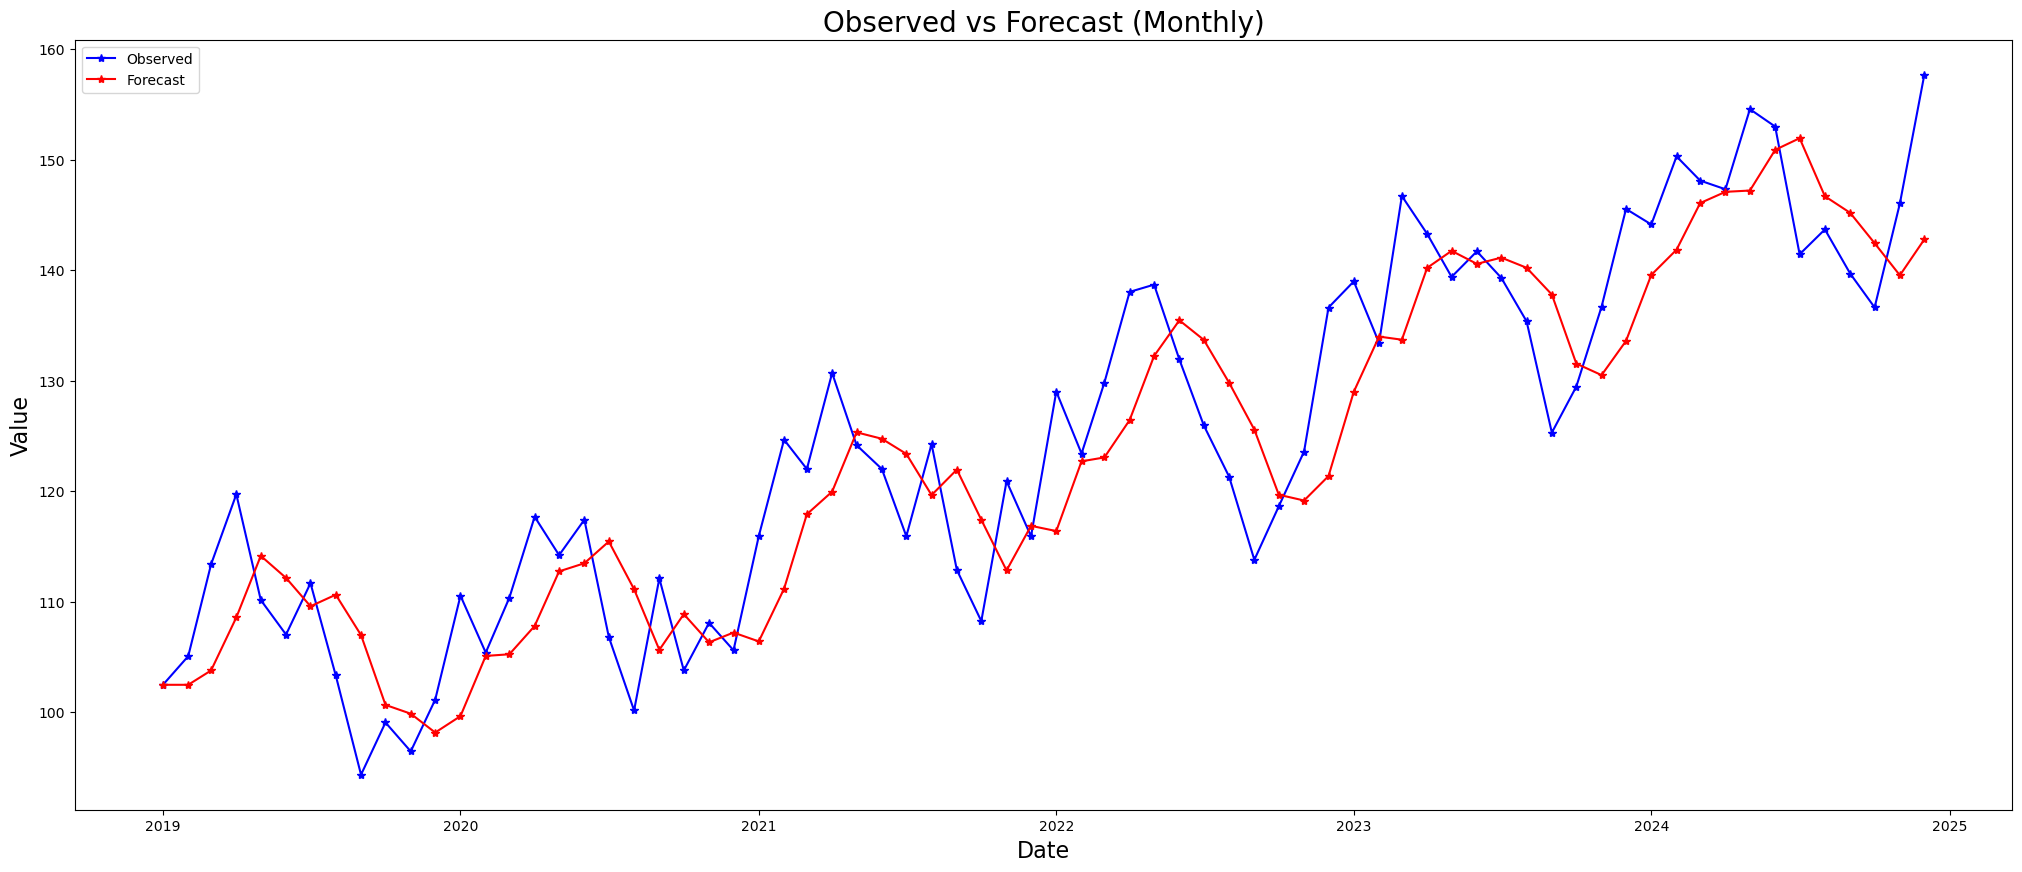

In [7]:
plt.figure(figsize=(25, 10))
plt.plot(df['Demand'], '-*', color='blue', label='Observed')
plt.plot(df['Forecast'], '-*', color='red', label='Forecast')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed vs Forecast (Monthly)', fontsize=20)
plt.legend(loc='best')
plt.show()

### Forecast future values

In [8]:
future_prediction = model.forecast(5)  # Forecast next 5 months
print("Future Forecast:\n", future_prediction)

Future Forecast:
 2025-01-01    150.239606
2025-02-01    150.239606
2025-03-01    150.239606
2025-04-01    150.239606
2025-05-01    150.239606
Freq: MS, dtype: float64


### Combine fitted values with forecast

In [9]:
pred_combined = pd.concat([df['Forecast'], future_prediction])

### Plot combined forecast

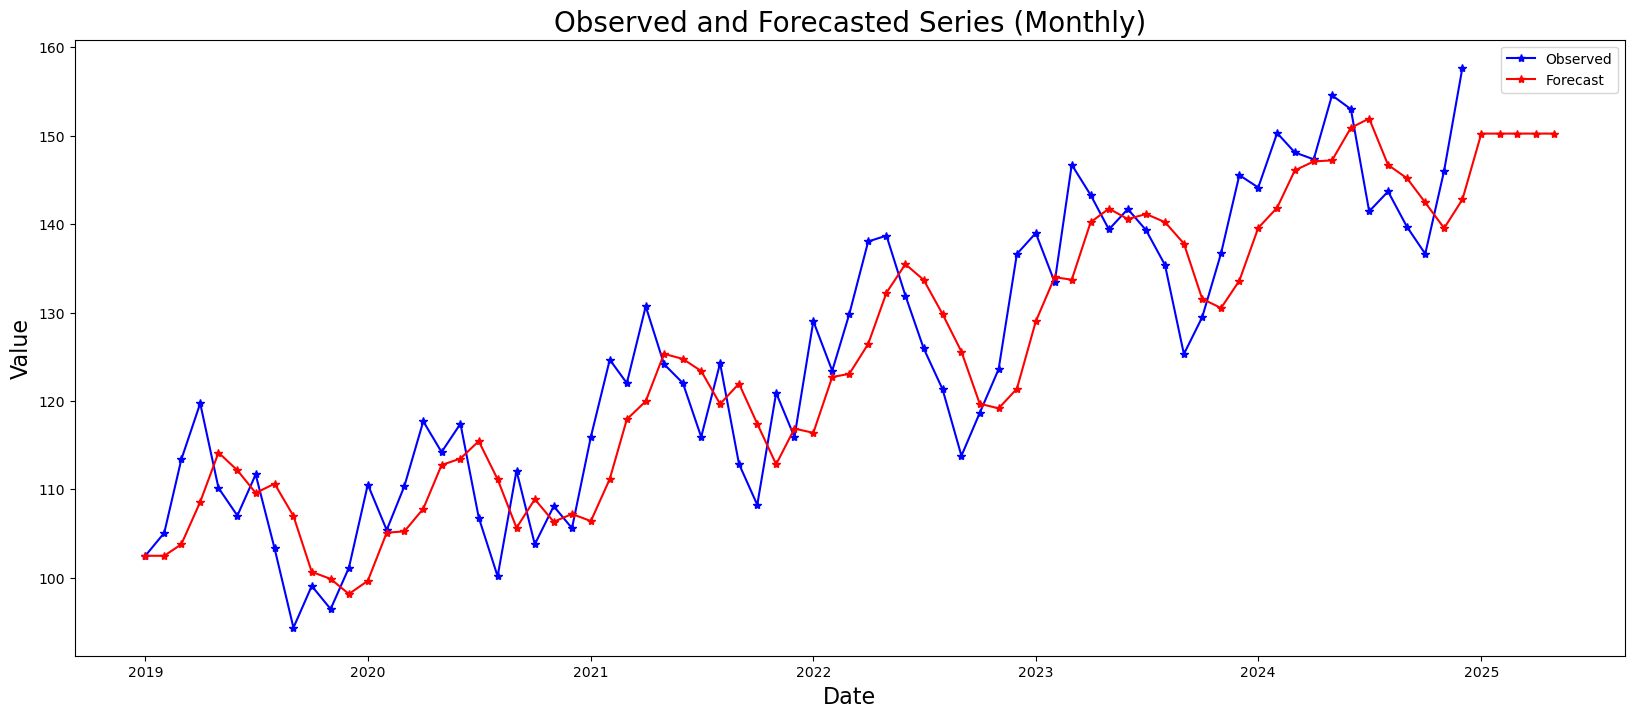

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(df['Demand'], '-*', color='blue', label='Observed')
plt.plot(pred_combined, '-*', color='red', label='Forecast')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed and Forecasted Series (Monthly)', fontsize=20)
plt.legend(loc='best')
plt.show()

### Error metrics for forecast

In [11]:
mse = mean_squared_error(df['Demand'], df['Forecast'])
mape = mean_absolute_percentage_error(df['Demand'], df['Forecast'])

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Squared Error (MSE): 54.62
Mean Absolute Percentage Error (MAPE): 4.95%


## Annual Forescast

In [12]:
### Resample data annually
df_annual = df['Demand'].resample('A').mean().to_frame()
df_annual.index = df_annual.index.strftime('%Y')  # Format years
df_annual.index.name = 'Year'

print("\nAnnualized Data:\n", df_annual)


Annualized Data:
           Demand
Year            
2019  105.322187
2020  109.349190
2021  119.801757
2022  127.568678
2023  137.934231
2024  146.886282


### Apply Simple Exponential Smoothing

In [13]:
annual_model = SimpleExpSmoothing(df_annual['Demand']).fit(optimized=True)
df_annual['Forecast'] = annual_model.fittedvalues

### Plot observed vs forecast (Annual)


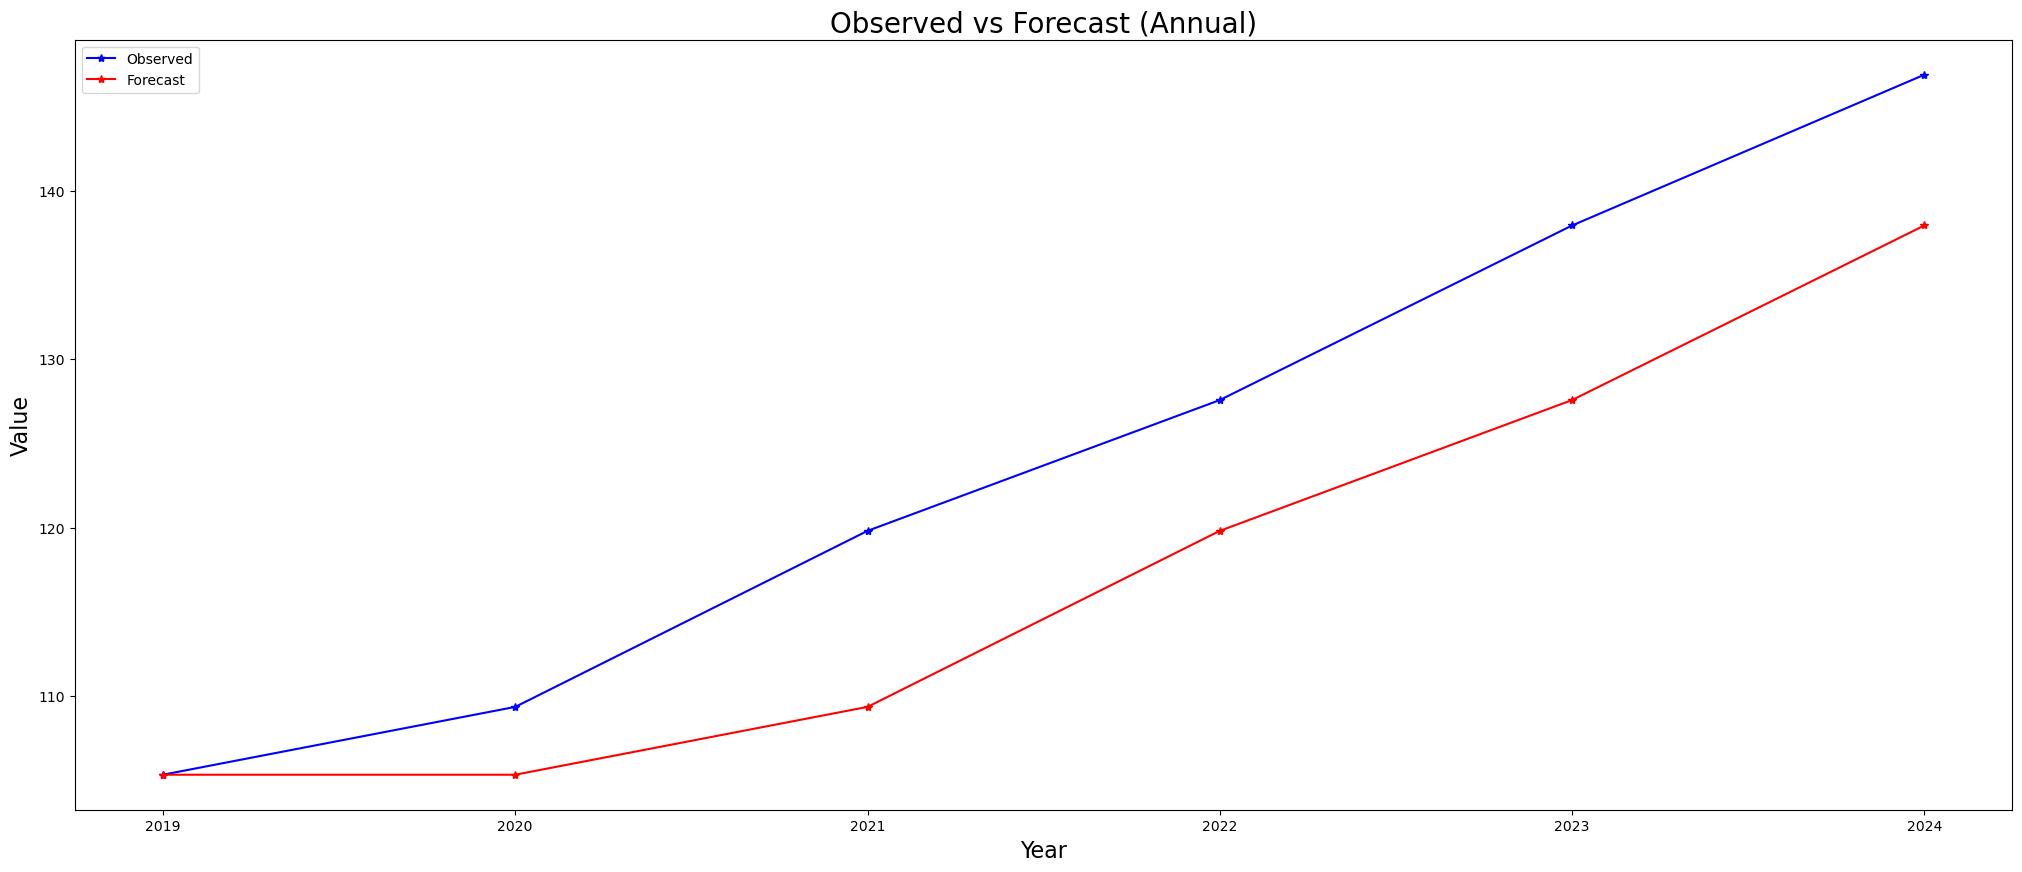

In [14]:
plt.figure(figsize=(25, 10))
plt.plot(df_annual['Demand'], '-*', color='blue', label='Observed')
plt.plot(df_annual['Forecast'], '-*', color='red', label='Forecast')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed vs Forecast (Annual)', fontsize=20)
plt.legend(loc='best')
plt.show()

### Forecast future value

In [15]:
future_annual_pred = annual_model.forecast(2) # Forecast next two years
future_annual_pred.index = pd.to_datetime(future_annual_pred.index).strftime('%Y')
print("\nFuture Annual Forecast:\n", future_annual_pred)


Future Annual Forecast:
 2025    146.886282
2026    146.886282
dtype: float64


### Combine fitted + forecast

In [16]:
pred_annual_combined = pd.concat([df_annual['Forecast'], future_annual_pred])

### Plot extended annual forecast

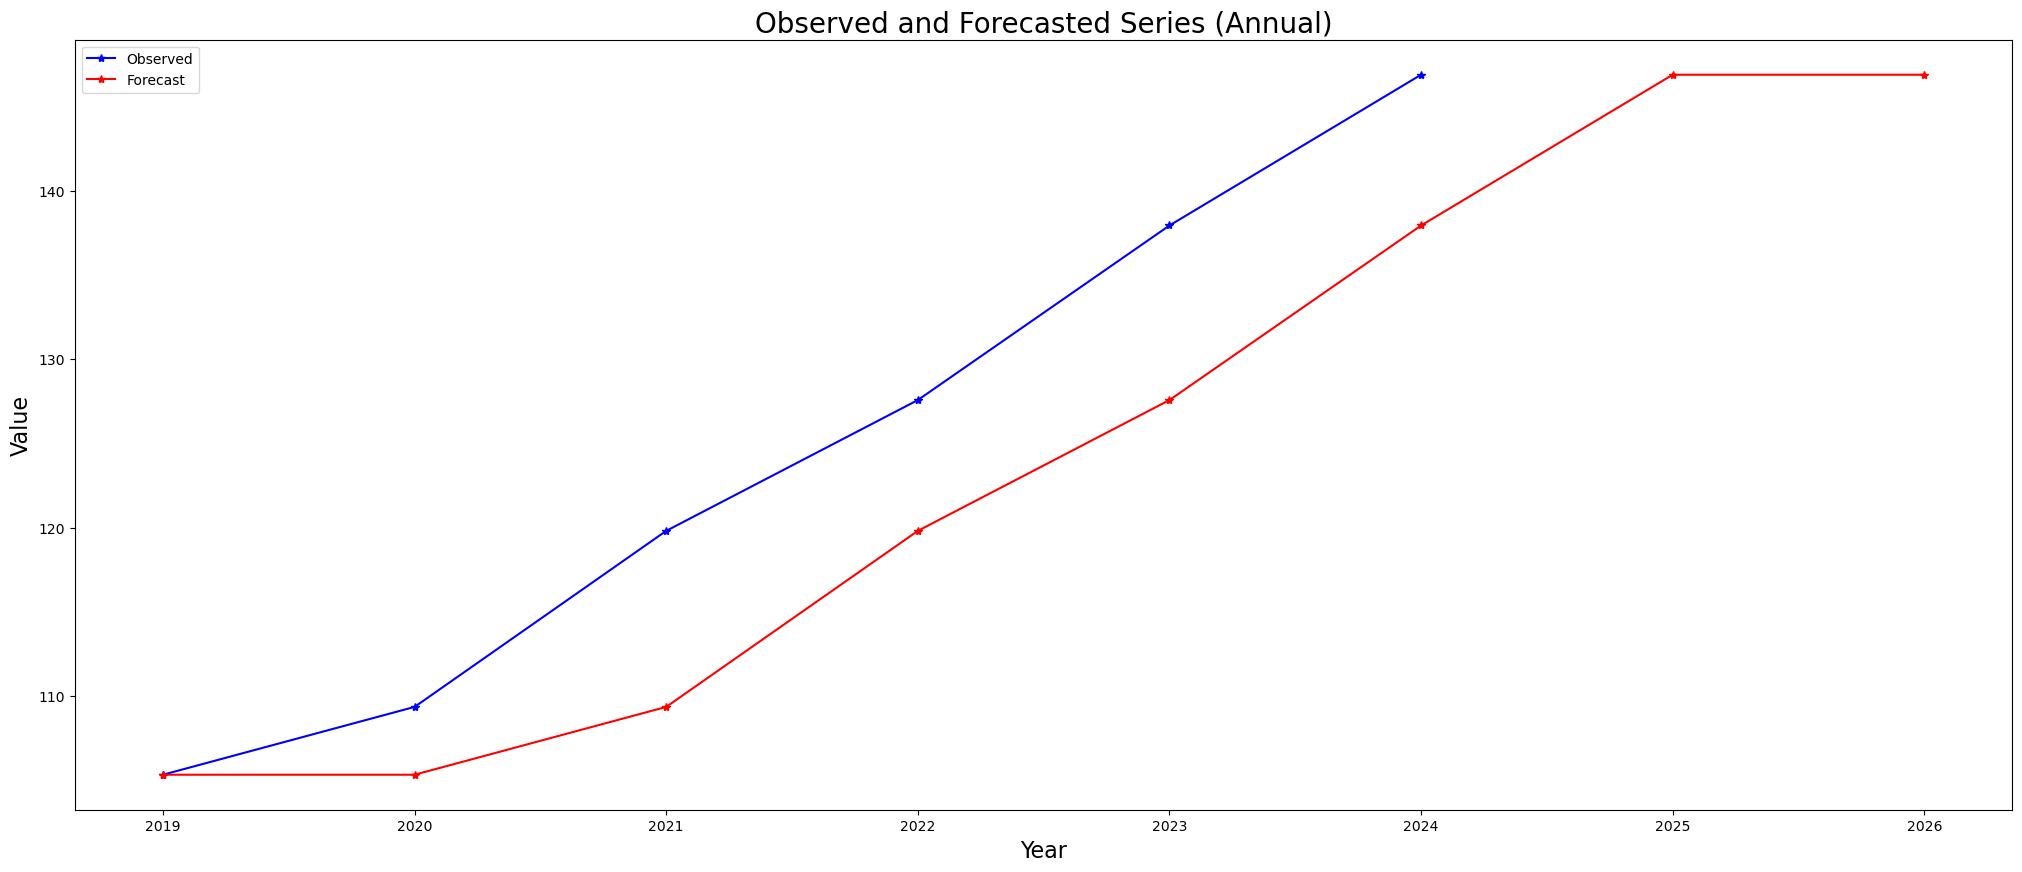

In [17]:
plt.figure(figsize=(25, 10))
plt.plot(df_annual['Demand'], '-*', color='blue', label='Observed')
plt.plot(pred_annual_combined, '-*', color='red', label='Forecast')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Observed and Forecasted Series (Annual)', fontsize=20)
plt.legend(loc='best')
plt.show()

### Error metrics for annual data

In [18]:
annual_mse = mean_squared_error(df_annual['Demand'], df_annual['Forecast'])
annual_mape = mean_absolute_percentage_error(df_annual['Demand'], df_annual['Forecast'])

print(f"Annual Mean Squared Error (MSE): {annual_mse:.2f}")
print(f"Annual Mean Absolute Percentage Error (MAPE): {annual_mape * 100:.2f}%")

Annual Mean Squared Error (MSE): 62.23
Annual Mean Absolute Percentage Error (MAPE): 5.35%
